# Emerging Technologies Project
 - Usman Sattar
 - G00345816

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras as kr

Using TensorFlow backend.


In [2]:
(train_img, train_lbl), (test_img, test_lbl) = kr.datasets.mnist.load_data()

train_img = train_img.reshape(60000, 784)
test_img = test_img.reshape(10000, 784)

train_img = train_img.astype('float32')
test_img = test_img.astype('float32')

train_img = train_img/255
test_img = test_img/255 

digits= 10

train_lbl = kr.utils.np_utils.to_categorical(train_lbl, digits)
test_lbl = kr.utils.np_utils.to_categorical(test_lbl, digits)

print("One hot vector at index 5 of training labels ", train_lbl[5])

One hot vector at index 5 of training labels  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


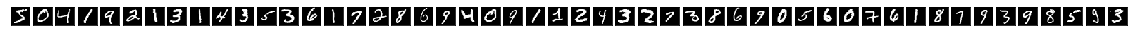

In [3]:
plt.figure(1, figsize=(20,10))

for i in range(50):
    plt.subplot(1,50,i+1)
    
    plt.imshow(train_img[i].reshape(28,28), cmap='gray', interpolation='nearest')
    
    plt.xticks([])
    plt.yticks([])

In [4]:
print("Creating model")
model = kr.models.Sequential()

print("Sequential model created")
print("Adding layers to model...")

model.add(kr.layers.Dense(392, activation='relu', input_shape=(784,)))
model.add(kr.layers.Dense(392, activation='relu'))

model.add(kr.layers.Dropout(0.2))

model.add(kr.layers.Dense(10, activation='softmax'))

print("Layers added to model")

Creating model
Sequential model created
Adding layers to model...
Layers added to model


In [5]:
print("Summarizing model...")
print("Model Summary")
model.summary()

Summarizing model...
Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 392)               154056    
_________________________________________________________________
dropout_1 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [6]:
print("Compiling model...")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model compiled")

Compiling model...
Model compiled


In [7]:
history = model.fit(train_img, train_lbl, batch_size=50, epochs=5, verbose=1, validation_data=(test_img, test_lbl))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.2066 - accuracy: 0.9376 - val_loss: 0.1145 - val_accuracy: 0.9633
Epoch 2/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.0819 - accuracy: 0.9744 - val_loss: 0.0733 - val_accuracy: 0.9762
Epoch 3/5
60000/60000 [==============================] - 8s 139us/step - loss: 0.0577 - accuracy: 0.9815 - val_loss: 0.0762 - val_accuracy: 0.9776
Epoch 4/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0736 - val_accuracy: 0.9785
Epoch 5/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.0354 - accuracy: 0.9882 - val_loss: 0.0865 - val_accuracy: 0.9748


In [8]:
score = model.evaluate(train_img, train_lbl, verbose=0)
print('Test cross-entropy loss: %0.9f' % score[0])
print('Test accuracy: %0.9f' % score[1])

Test cross-entropy loss: 0.025551854
Test accuracy: 0.991366684


In [9]:
print("Saving Model......")
model.save('model.h5')
print("Model Saved.")

Saving Model......
Model Saved.


In [10]:
print("Loading Model......")
loadedModel = kr.models.load_model('model.h5')
print("Model loaded.")

Loading Model......
Model loaded.


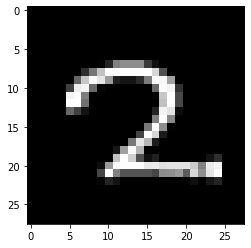

('Predicted digit: ', 2)

In [11]:
plt.imshow(test_img[77].reshape(28, 28), cmap="gray")
plt.show()

"Predicted digit: ", np.argmax(loadedModel.predict(test_img[77:78]))